Adınız: Mert

Soyadınız: Gökce

Okul Numaranız: 2212721057

GitHub Repo Bağlantısı: https://github.com/mertgokce07/YoloV8_Nesne_Tespiti

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

BASE_DIR = "/content/drive/MyDrive/Colab Notebooks/yolo8dataset"
print("BASE_DIR içi:", os.listdir(BASE_DIR))


BASE_DIR içi: ['data.yaml', 'README.roboflow.txt', 'valid', 'train', 'test']


In [3]:
DATA_YAML = BASE_DIR + "/data.yaml"

with open(DATA_YAML, "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Ayakkabi', 'Bot']

roboflow:
  workspace: yolov8nesnetespiti
  project: ayakkabi-bot-yolov8
  version: 1
  license: Private
  url: https://app.roboflow.com/yolov8nesnetespiti/ayakkabi-bot-yolov8/1


In [4]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data=DATA_YAML,
    epochs=8,
    imgsz=416,
    batch=4,
    workers=2,
    cache=False,
    device="cpu"
)

Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/yolo8dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=8, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e4b2b2675c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [11]:
import glob
best = glob.glob("runs/detect/train*/weights/best.pt")
best


['runs/detect/train3/weights/best.pt']

In [12]:
!cp runs/detect/train3/weights/best.pt "/content/drive/MyDrive/Colab Notebooks/best.pt"

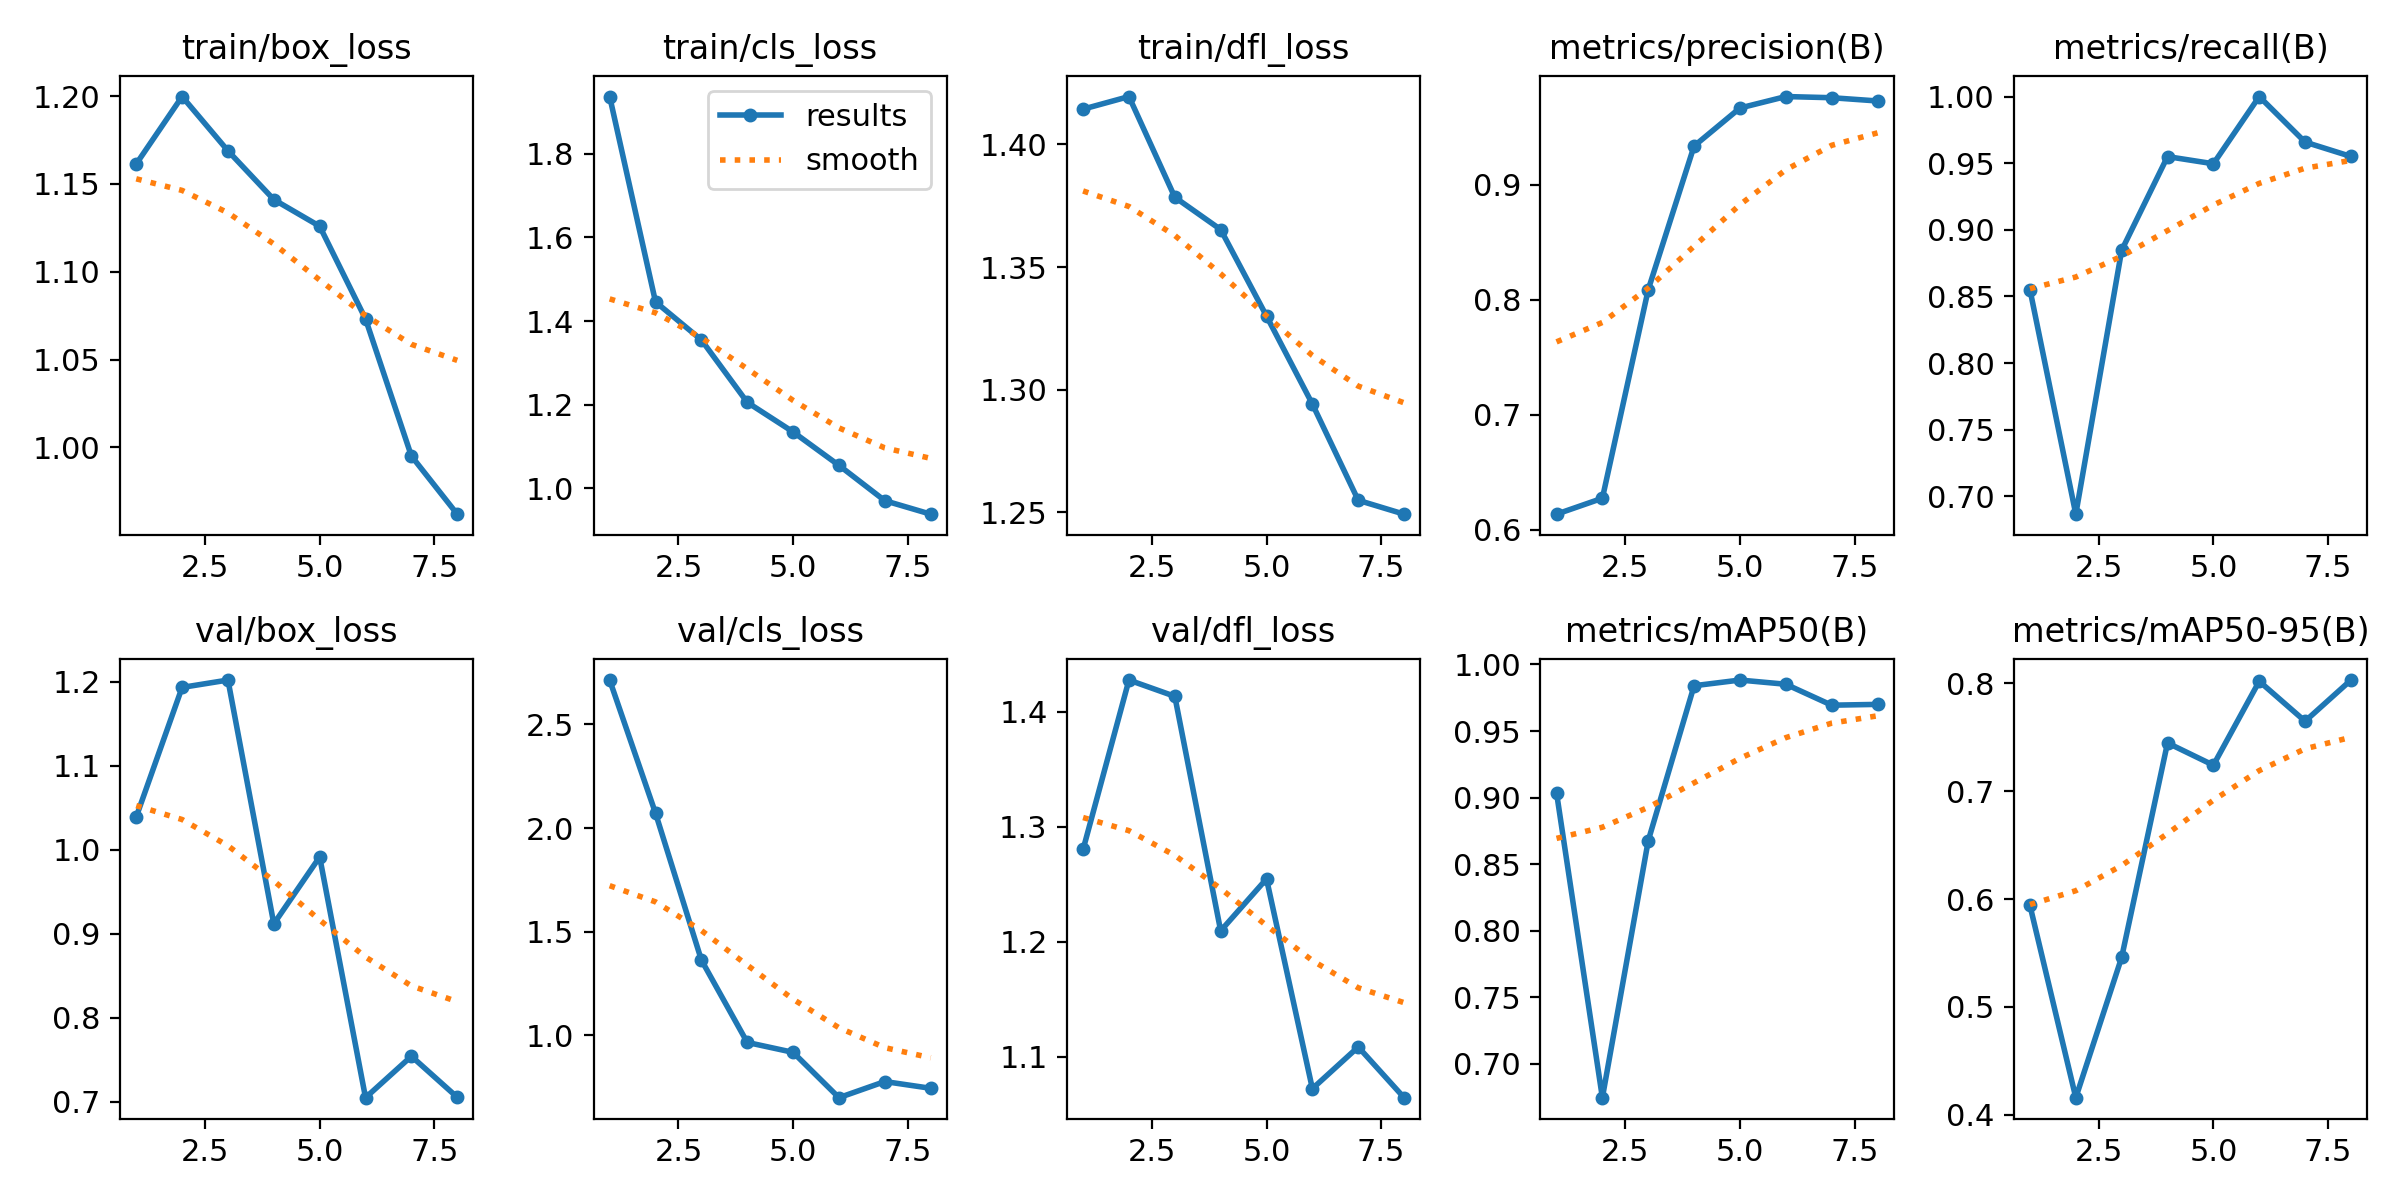

In [13]:
from PIL import Image
Image.open("runs/detect/train3/results.png")

YOLOv8n modeli, ayakkabı ve bot nesnelerini tespit etmek üzere eğitilmiştir. Eğitim sonucunda model mAP@0.5 metriğinde %97 başarı elde etmiş, precision ve recall değerleri %95’in üzerinde gerçekleşmiştir. Bu sonuçlar modelin nesneleri yüksek doğrulukla tespit edebildiğini göstermektedir.”